#### Importing the libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataframe

In [22]:
df = pd.read_csv("/Users/srishtisahu/.Trash/Hands On_ Predictive Analysis in Diabetes/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Outcome is 0s and 1s --> binary classifiction (logistic regression)

Note: so many 0s, although not null!

In [24]:
df.shape

(768, 9)

#### Checking for null values

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Correlation coeffs

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


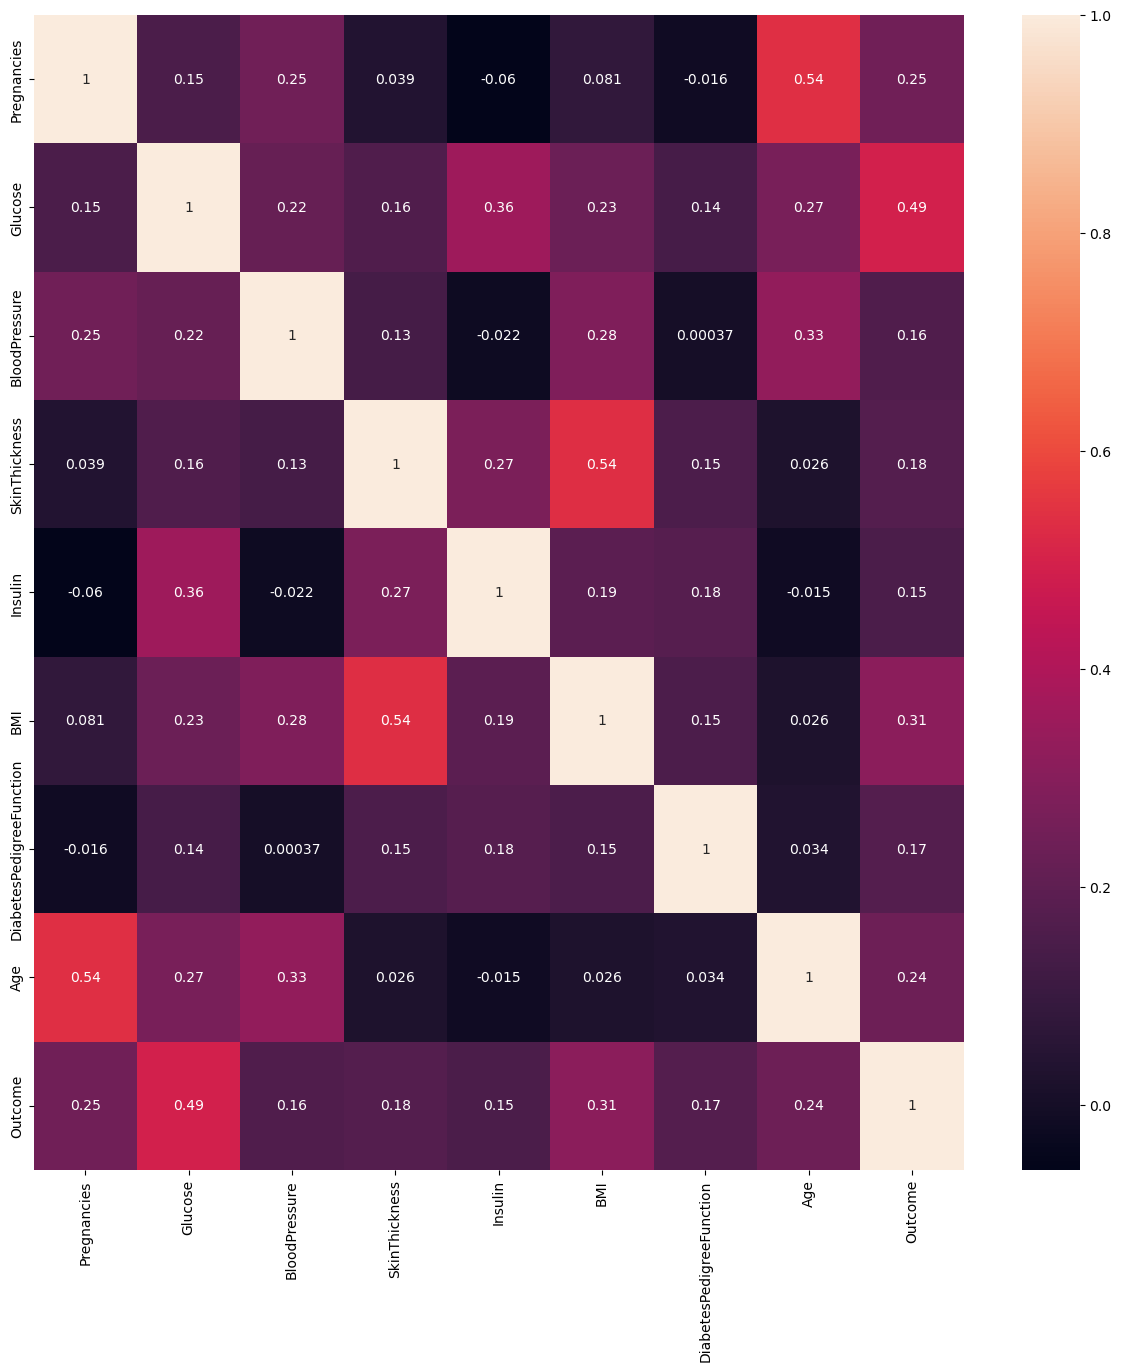

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()
plt.savefig('heatmap.jpg')

#### Descriptive stats

In [28]:
df.describe();

#### Data imputation

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/83204562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies)


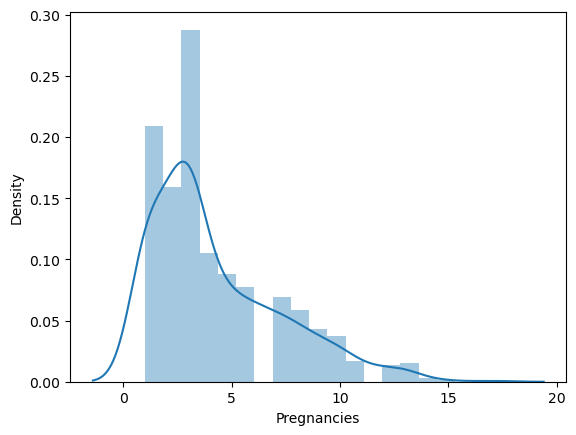

In [52]:
sns.distplot(df.Pregnancies)
plt.savefig('Pregnancies.jpg')

imputation --> median (skewed)

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/1752132118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose)


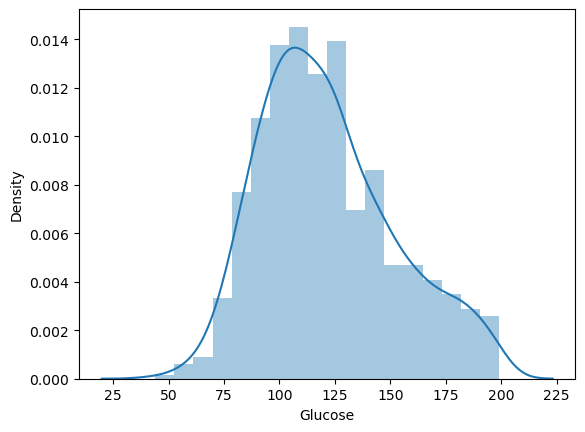

In [53]:
sns.distplot(df.Glucose)
plt.savefig('glucose.jpg')

imputation --> mean

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/435904739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BloodPressure)


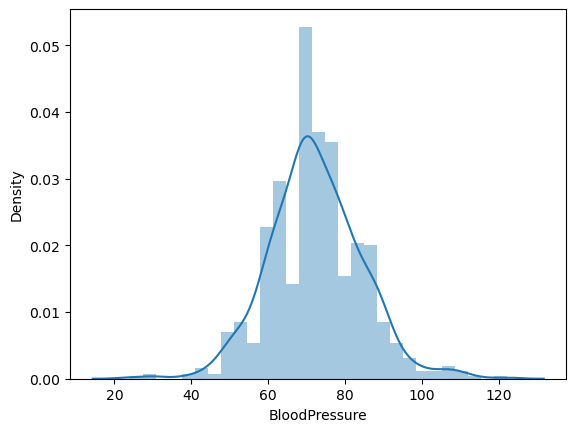

In [54]:
sns.distplot(df.BloodPressure)
plt.savefig('bloodpressure.jpg')

imputation --> mean

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/2563742406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SkinThickness)


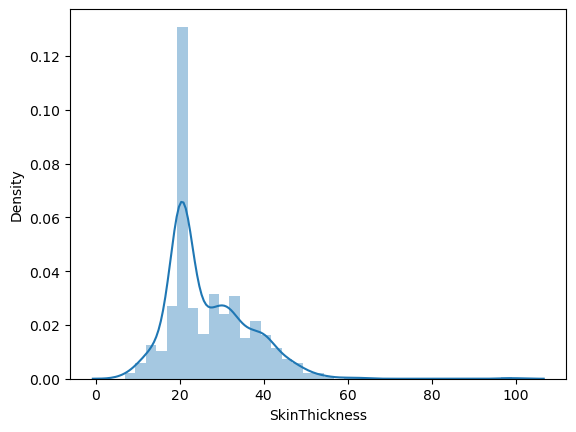

In [55]:
sns.distplot(df.SkinThickness)
plt.savefig('skinthickness.jpg')

imputation --> mean

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/3621558164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Insulin)


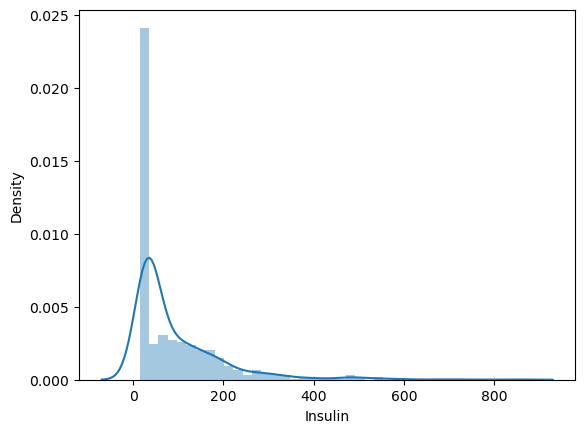

In [56]:
sns.distplot(df.Insulin)
plt.savefig('insulin.jpg')

imputation --> median (skewed)

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/2258387496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMI)


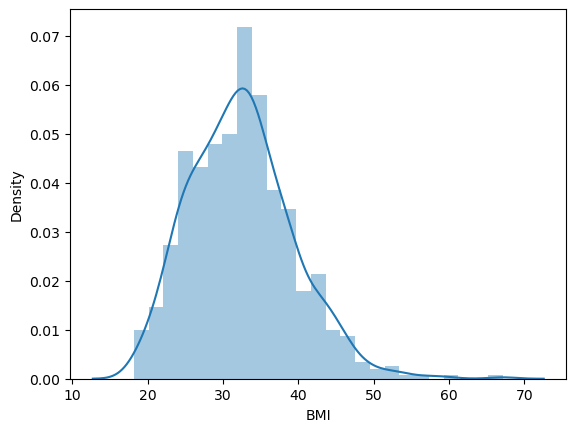

In [57]:
sns.distplot(df.BMI)
plt.savefig('BMI.jpg')

imputation --> mean

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/4040970658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DiabetesPedigreeFunction)


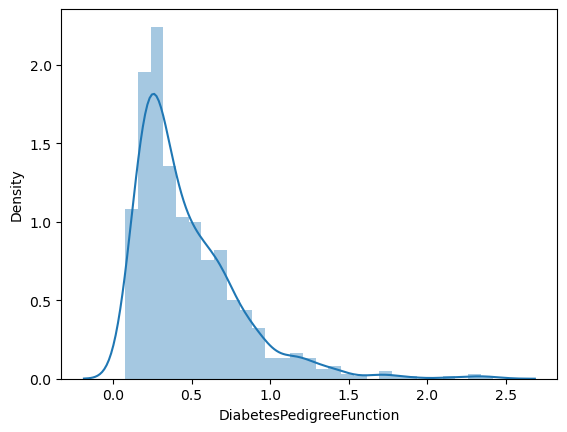

In [58]:
sns.distplot(df.DiabetesPedigreeFunction)
plt.savefig('diabetespedigreefunction.jpg')

imputation --> median

/var/folders/nr/3l37qld50553qv868l3njmh80000gn/T/ipykernel_1659/307665172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


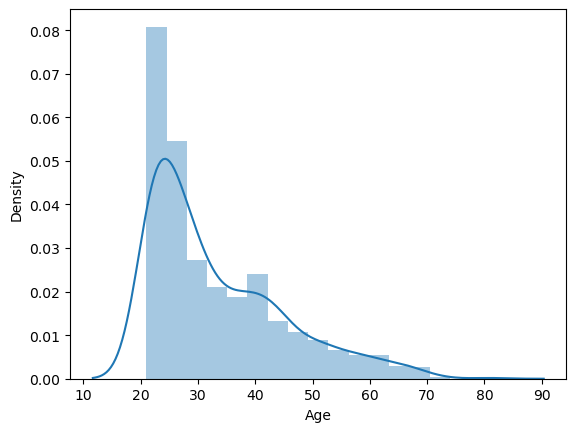

In [59]:
sns.distplot(df.Age)
plt.savefig('age.jpg')

imputation --> median

In [43]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0, df['Age'].median())

#### Outlier detection - boxplots

In [49]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

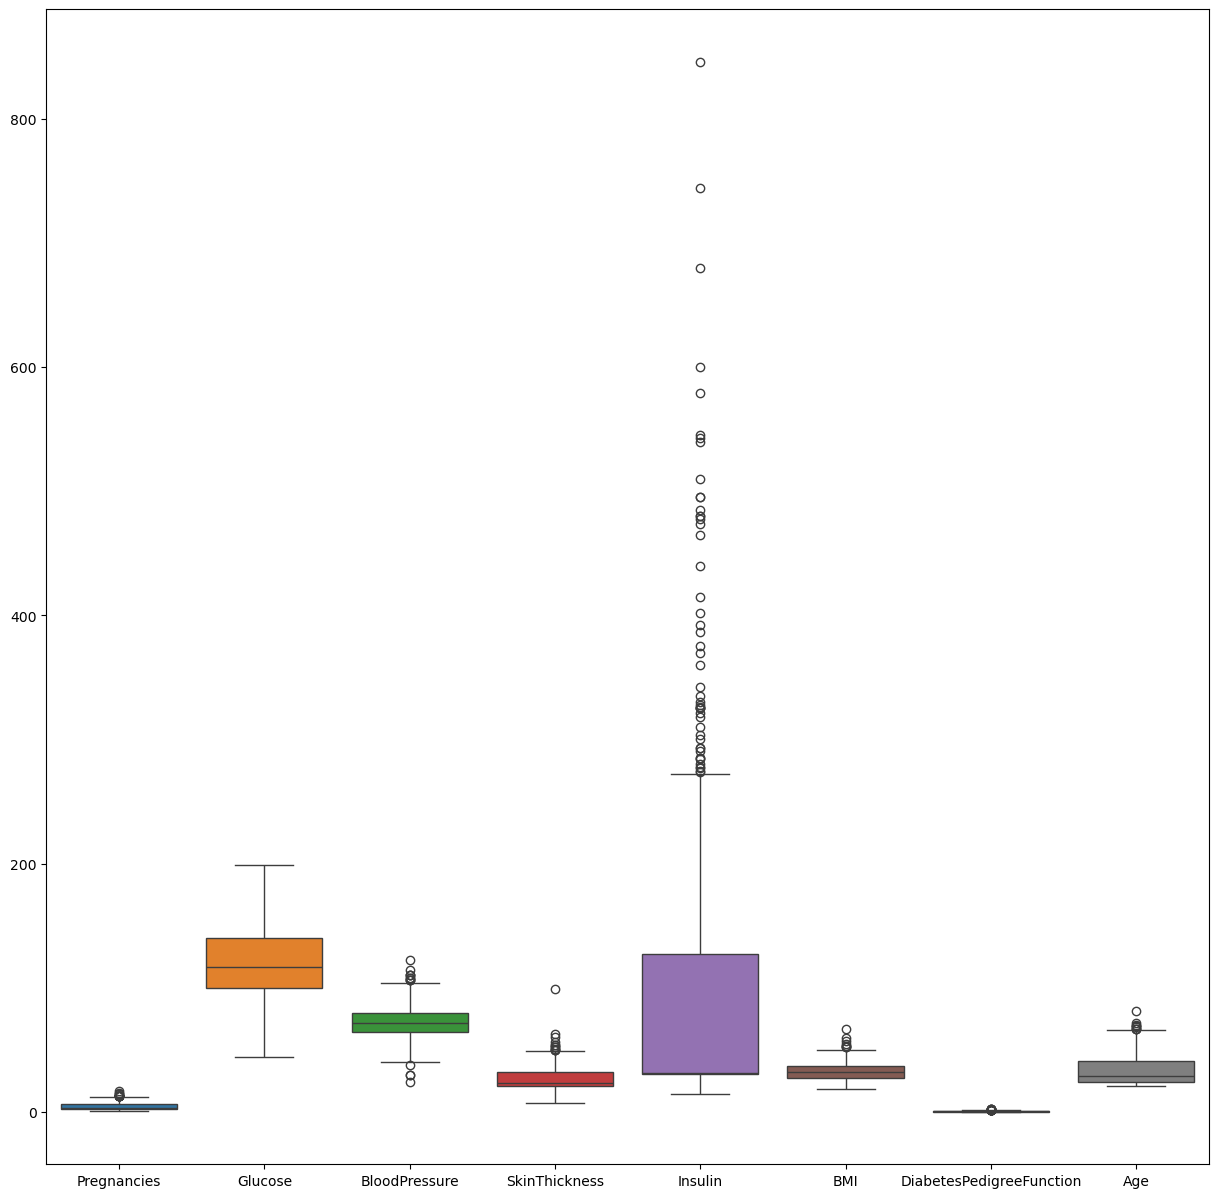

In [60]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X, ax = ax)
plt.savefig('boxplots.jpg')

In [67]:
cols = list(X.columns)

In [69]:
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q1 + 1.5*IQR
    mask = (X[col]>=lower_bound) & (X[col]<=upper_bound)

In [71]:
X.shape

(768, 8)

In [ ]:
X_refined = X[mask]
y_refined = y[mask]

In [74]:
X_refined.shape

(679, 8)

#### Standardization

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_refined)

In [106]:
X_scaled = pd.DataFrame(X_scaled, columns=cols)

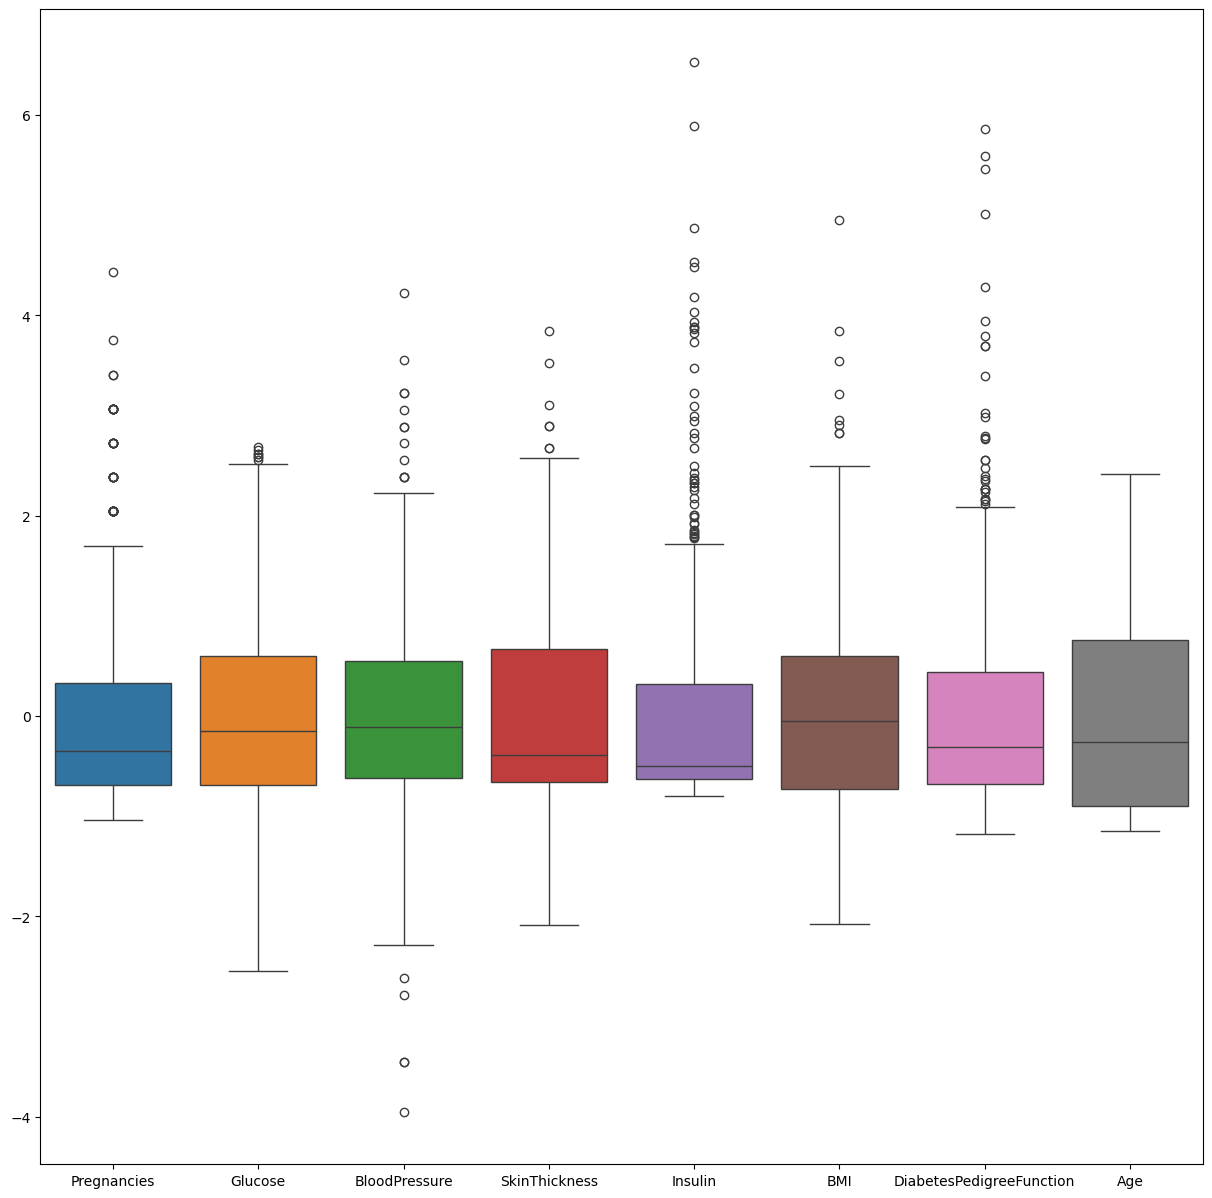

In [107]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X_scaled, ax = ax)
plt.savefig('refined_boxplots.jpg')

In [108]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.790000e+02,6.790000e+02,6.790000e+02,6.790000e+02,6.790000e+02,6.790000e+02,6.790000e+02,6.790000e+02
mean,4.709046e-17,-1.726650e-16,-3.374816e-16,-1.216504e-16,-2.354523e-17,-9.679706e-17,2.354523e-17,-1.831296e-17
std,1.000737e+00,1.000737e+00,1.000737e+00,1.000737e+00,1.000737e+00,1.000737e+00,1.000737e+00,1.000737e+00
min,-1.032536e+00,-2.541788e+00,-3.949359e+00,-2.088877e+00,-7.968245e-01,-2.072986e+00,-1.172247e+00,-1.149710e+00
25%,-6.908734e-01,-6.862080e-01,-6.131444e-01,-6.541771e-01,-6.312004e-01,-7.233665e-01,-6.737520e-01,-8.948442e-01
50%,-3.492106e-01,-1.464029e-01,-1.127122e-01,-3.930716e-01,-4.956897e-01,-4.855662e-02,-3.073879e-01,-2.576806e-01
75%,3.341150e-01,5.958292e-01,5.545307e-01,6.668069e-01,3.173742e-01,5.975379e-01,4.358507e-01,7.617811e-01
max,4.434069e+00,2.687574e+00,4.224366e+00,3.846442e+00,6.530788e+00,4.947908e+00,5.860742e+00,2.418406e+00


In [109]:
y_refined.value_counts()

Outcome
0    454
1    225
Name: count, dtype: int64

Usually in classification problems, number of 1s and 0s and approximately the same. However in healthcare data, this is a major issue.

To further reduce outliers, we use quantiles.

In [110]:
#insulin has to most outliers
q = X_scaled['Insulin'].quantile(.95) 
datanew = X_scaled[X_scaled['Insulin']<q]

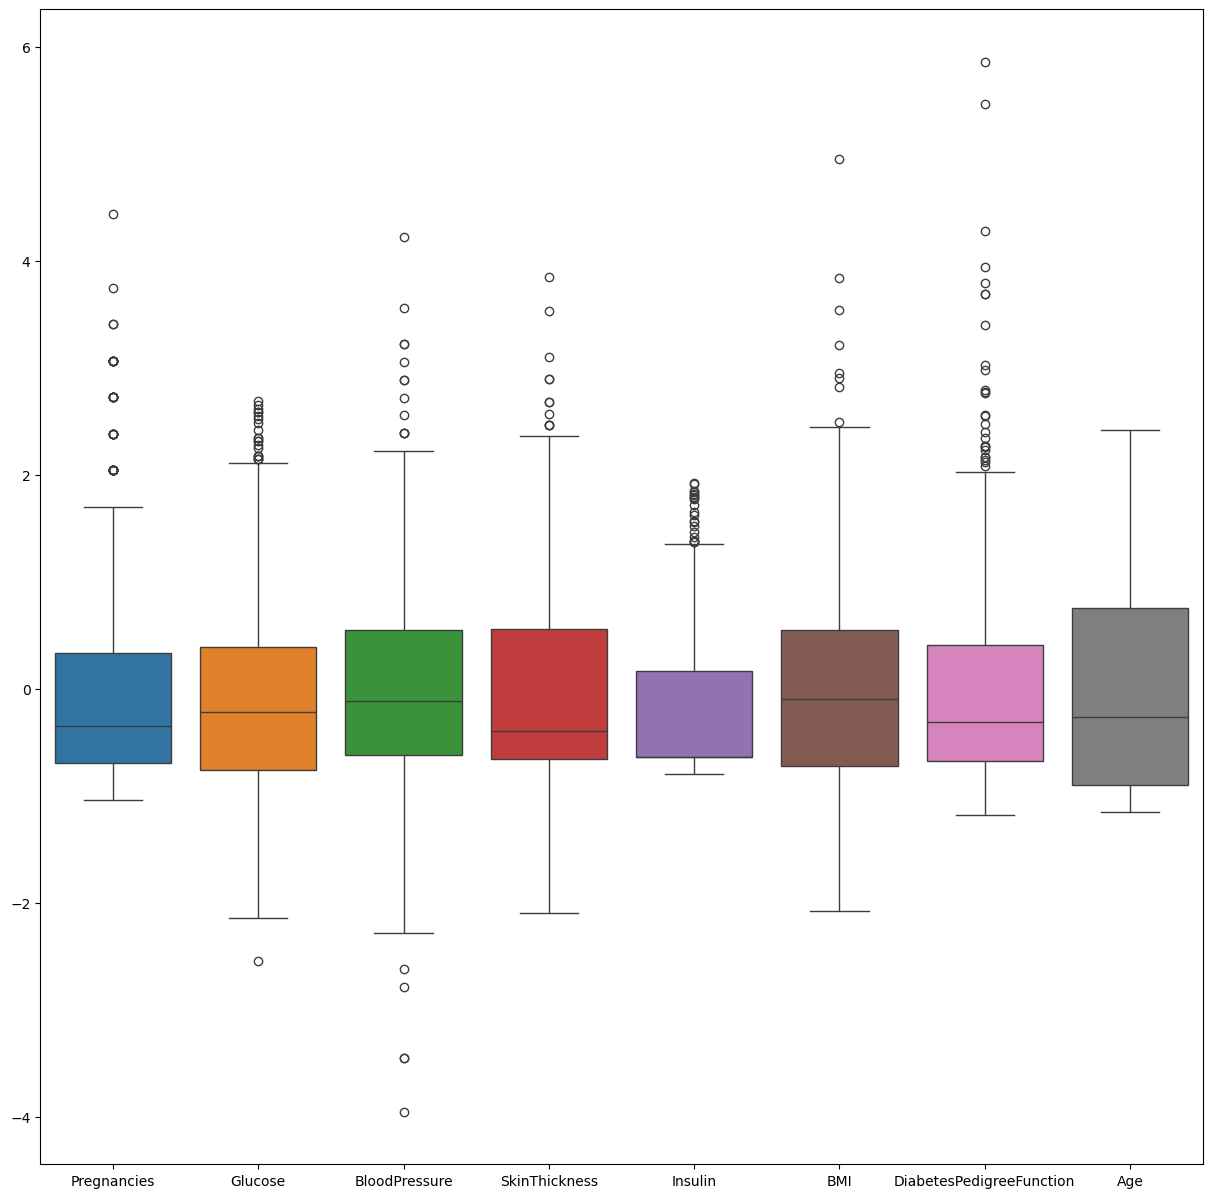

In [115]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = datanew, ax = ax)
plt.savefig('refined_boxplots2.jpg')

In [116]:
datanew.to_csv("refined_data.csv", index=False)